Here will be an example of  predicting hydraulic frac stages that are expected to be challenging to treat

*Several Model Classifications model will be used*

**Note that the same example will be taken but with different classification models**

# SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving Chapter5_Fracability_DataSet.xlsx to Chapter5_Fracability_DataSet.xlsx


{'Chapter5_Fracability_DataSet.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [3]:
df=pd.read_excel('Chapter5_Fracability_DataSet.xlsx')
df.head()

,MD_ft,Resistivity,YM/PR,GR,Minimum Horizontal Stress Gradient,Fracability
0,13472.772070,466.626844,16.341279,481.414851,0.703538,1
1,9370.348405,577.253950,15.403192,324.750529,0.497242,0
2,10634.130671,439.087333,26.528042,265.034727,0.766302,0
3,18194.375034,309.679533,18.789840,169.480991,1.218154,1
4,18861.977710,614.959877,18.048478,480.189015,1.171049,1


0 stands for stages that aren't challenging to frac while 1 stands for the opposite which was in need to more chemicals 

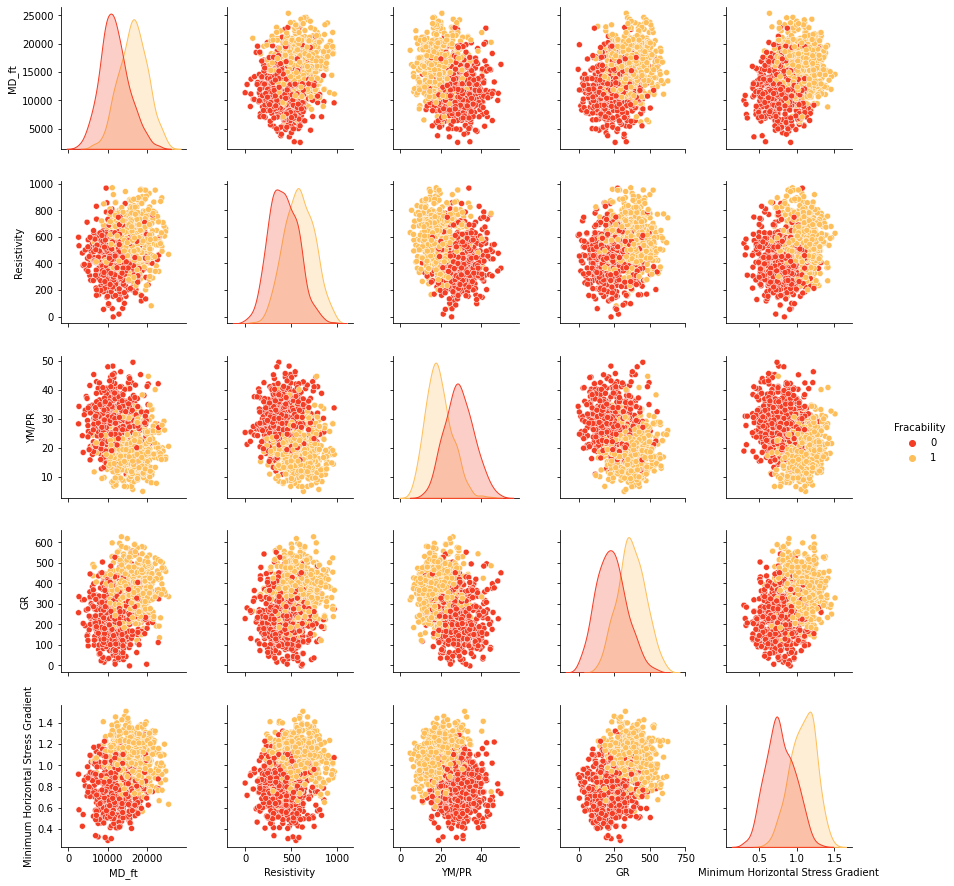

In [4]:
sns.pairplot(df, hue='Fracability', palette='YlOrRd_r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Fracability Count Plot')

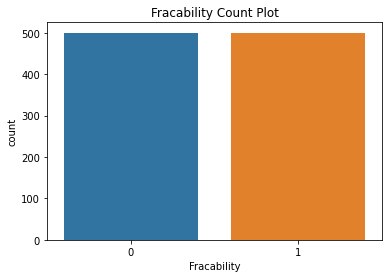

In [5]:
sns.countplot(df['Fracability'])
plt.title('Fracability Count Plot')
#they have equal count 

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler=MinMaxScaler()
x=df.drop(['Fracability'], axis='columns')
y=df['Fracability']
x_scaled=scaler.fit_transform(x)
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size=0.3, random_state=50)

In [7]:
from sklearn.svm import SVC
svm=SVC(gamma=1)
svm.fit(x_train , y_train)
y_pred_train=svm.predict(x_train)
y_pred_test=svm.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy Score for testing model', accuracy_score(y_test, y_pred_test))

Accuracy Score for testing model 0.9366666666666666


In [9]:
print('Calssification Report:', classification_report(y_test, y_pred_test))

Calssification Report:               precision    recall  f1-score   support

           0       0.97      0.91      0.94       152
           1       0.91      0.97      0.94       148

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [10]:
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_test))

Confusion Matrix: [[138  14]
 [  5 143]]


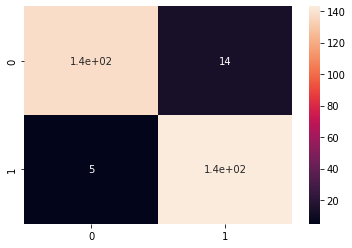

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

In [12]:
from sklearn.model_selection import cross_val_score
np.random.seed(50)
cross_val_score(svm, x_scaled,y,cv=10, scoring='accuracy').mean() 
#used accuracy instead of r2 since here its calssification and not regression, so using r2 will lead to negative score

0.9390000000000003

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=5000, min_samples_leaf=5, random_state=50)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

Calssification Report:               precision    recall  f1-score   support

           0       0.96      0.91      0.94       152
           1       0.92      0.96      0.94       148

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Confusion Matrix: [[139  13]
 [  6 142]]


0.9390000000000003

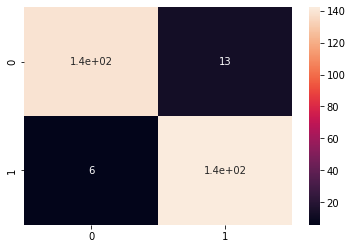

In [14]:
print('Calssification Report:', classification_report(y_test, y_pred))

print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
np.random.seed(50)

cross_val_score(svm, x_scaled,y,cv=10, scoring='accuracy').mean() 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


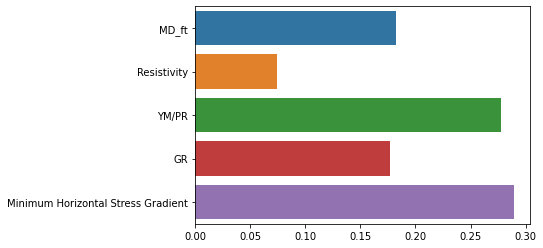

In [18]:
fi=rf.feature_importances_
series = pd.Series(fi, x.columns)
sns.barplot(series, series.index)

# Extra trees

In [23]:
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier(min_samples_leaf=5, random_state=50)

et.fit(x_train, y_train)

y_pred=et.predict(x_test)

Calssification Report:               precision    recall  f1-score   support

           0       0.85      0.85      0.85       152
           1       0.85      0.85      0.85       148

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

Confusion Matrix: [[129  23]
 [ 22 126]]
Accuray score: 0.85
Average cross validation score: 0.877


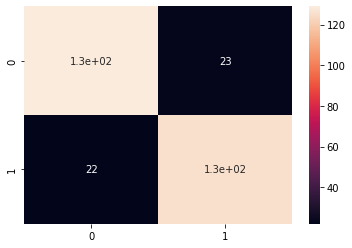

In [27]:
print('Calssification Report:', classification_report(y_test, y_pred))

print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

print('Accuray score:', accuracy_score(y_test, y_pred))


print('Average cross validation score:',cross_val_score(et, x_scaled,y,cv=10, scoring='accuracy').mean() )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


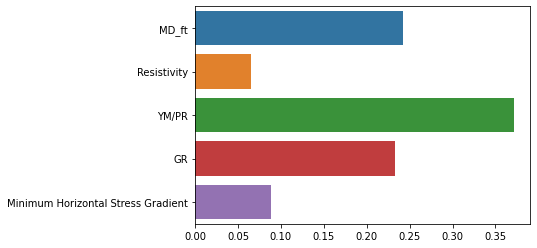

In [32]:
fi=et.feature_importances_
series = pd.Series(fi, x.columns)
sns.barplot(series, series.index)

# Gradient boosting

Calssification Report:               precision    recall  f1-score   support

           0       0.95      0.90      0.93       152
           1       0.90      0.95      0.93       148

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Confusion Matrix: [[137  15]
 [  7 141]]
Accuray score: 0.9266666666666666
Average cross validation score: 0.9219999999999999


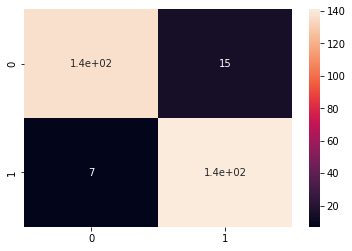

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=2000)
gb.fit(x_train , y_train)
y_pred=gb.predict(x_test)

print('Calssification Report:', classification_report(y_test, y_pred))

print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

print('Accuray score:', accuracy_score(y_test, y_pred))


print('Average cross validation score:',cross_val_score(gb, x_scaled,y,cv=10, scoring='accuracy').mean() )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


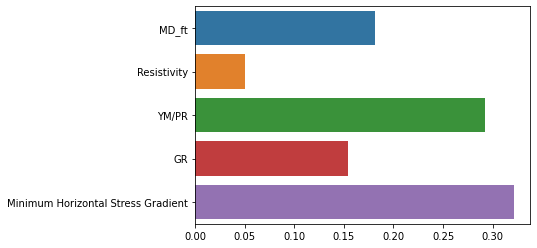

In [33]:
fi=gb.feature_importances_
series = pd.Series(fi, x.columns)
sns.barplot(series, series.index)

# XGB

Calssification Report:               precision    recall  f1-score   support

           0       0.95      0.90      0.93       152
           1       0.90      0.95      0.93       148

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Confusion Matrix: [[137  15]
 [  7 141]]
Accuray score: 0.9266666666666666
Average cross validation score: 0.9200000000000002


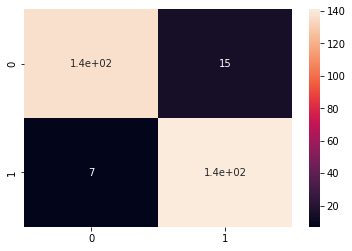

In [31]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=5000, objective="binary:logistic") #
xgb.fit(x_train , y_train)
y_pred=xgb.predict(x_test)

print('Calssification Report:', classification_report(y_test, y_pred))

print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

print('Accuray score:', accuracy_score(y_test, y_pred))


print('Average cross validation score:',cross_val_score(xgb, x_scaled,y,cv=10, scoring='accuracy').mean() )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


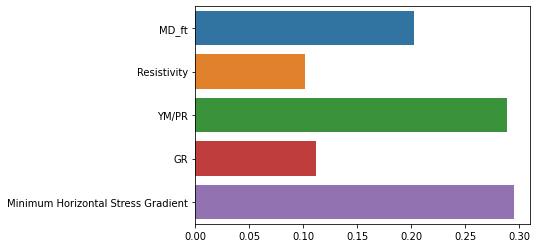

In [34]:
fi=xgb.feature_importances_
series = pd.Series(fi, x.columns)
sns.barplot(series, series.index)

**CONCLUSION**

*All models have an approximately the same results, but SVM proved to be the top of all*